<p style="text-align: center; font-size: 300%"> Computational Finance </p>
<img src="img/ABSlogo.svg" alt="LOGO" style="display:block; margin-left: auto; margin-right: auto; width: 50%;">

# Monte Carlo Methods
## Brownian Motion
* We saw last week that the binomial tree implies for $X_t\equiv \log S_t$ that
$$
X_{i\delta t}=X_{(i-1)\delta t}+R_i \Longleftrightarrow
\Delta X_i = R_i,\tag{$\dagger$}
$$
where $R_i=\log u$ or $R_i=\log d$, with probabilities $\mathbb{Q}[u]$ and $\mathbb{Q}[d]$. 
* Equation ($\dagger$) is a *stochastic difference equation*.
* Its *solution* 
$$
X_T=\log S_0 +\sum_{i=1}^N R_i=\log S_0 +\sigma \sqrt{\delta t}(2k-N)
$$
is called a *binomial process*, or in the special case with
$\mathbb{E}[R_i]=0$, a *random walk*.


* We also saw that if we let $N\rightarrow\infty$ (so that $\delta t \rightarrow 0$),
$$
X_T-X_0\stackrel{d}{\rightarrow}N(\mu T,\sigma^2 T),\quad \mu\equiv r-\frac{1}{2}\sigma^2.
$$
* The argument can be repeated for every $X_t, t\leq T$, showing that
$$
X_t-X_0\stackrel{d}{\rightarrow}N(\mu t,\sigma^2 t),
$$
and that for any $0\lt t\lt T$, $X_t-X_0$ and $X_T-X_t$ are independent.
* As $\delta t\rightarrow 0$, $\{X_t\}_{t\geq 0}$ becomes a continuous time process: the indexing set is now given by the entire positive real line.
* This continuous time limit (with $\mu=0$ and $\sigma^2=1$) is called *Brownian motion*, or *Wiener process*.
* From now on, rather than modelling in discrete time and then letting $\delta t \rightarrow 0$, we will directly model in continuous time, using Brownian motion as a building block.


* Definition of (standard) *Brownian Motion*:
Stochastic process $\{W_{t}\}_{t\geq 0}$ satisfying
  * $W_{0}=0$;
  * The increments $W_{t} - W_s$ are independent for all $0 \le s < t$;
  * $W_{t} - W_s \sim N(0,t-s)$ for all $0 \le s \le t$;
  * Continuous sample paths.

* This is standard Brownian motion, whereas $X_{t}=\sigma W_{t}$ is Brownian motion with variance $\sigma ^{2}$.
* Restriction that process start at zero may be loosened by considering $X_{t}=X_{0}+\sigma W_{t}$.
* Brownian motion with drift: $X_{t}=X_{0}+\mu t+\sigma W_{t}$, so that $\mathbb{E}[X_t]=X_{0}+\mu t$, $\mathrm{Var}[X_t]=\sigma^{2}t$.


* Properties of Brownian Sample Paths:
  * *Continuity*: by assumption, and also $W_{t+\delta t}-W_{t}\sim N(0,\delta t)\rightarrow 0$ as $\delta t\downarrow0$;
  * *Nowhere differentiability*: intuitively, this is seen from
$$
\frac{W_{t}-W_{t-\delta t}}{\delta t}\sim N\left( 0,\frac{1}{\delta t}\right) ,\quad \frac{%
W_{t+\delta t}-W_{t}}{\delta t}\sim N\left( 0,\frac{1}{\delta t}\right) ;
$$
left and right difference quotients do not have (common) limit as $\delta t\downarrow 0$.
  * *Self-similarity*: Zooming in on a Brownian motion yields another Brownian motion: for any $c>0$, $X_{t}=\sqrt{c}W_{t/c}$ is
a Brownian motion.



<img src="img/BMpaths.svg" alt="Simulated Brownian Motion Paths" style="display:block; margin-left: auto; margin-right: auto; width: 80%;">

* Brownian motion itself is not a very useful model for stock prices, because it can become negative. Instead we model $X_t\equiv \log S_t$ as a Brownian motion with drift:

\begin{align*}
X_{t}&=X_{0}+\mu t+\sigma W_{t}\mbox{, so that}\\
S_t&=\exp(X_t)\\
&=S_0\exp(\mu t+\sigma W_{t}).
\end{align*}
* The resulting process for $S_t$ is called *Geometric Brownian motion* (GBM).
* This implies that the log return $\log S_t-\log S_s=X_t-X_s$, $s\lt t$,
is independent of $X_{s}$, with constant variance for fixed $(t-s)$.

<img src="img/GBMpaths.svg" alt="Simulated GBM Paths" style="display:block; margin-left: auto; margin-right: auto; width: 80%;">

## Continuous Time Martingales
* In continuous time, a process $\{X_{t}\}_{t\geq 0}$ is a *martingale* if
  * $\mathbb{E}[|X_{t}|]<\infty $, for all $t\ge 0$; 
  * $\mathbb{E}[X_{t}|\mathcal{F}_{s}]=X_{s}$, for all $t>s\ge 0$,
where $\mathcal{F}_{t}$ denotes the information on $X_t$ up to time $t$.

* E.g., for Brownian motion
  * $\mathbb{E}[|W_{t}|]<\infty $ because $W_{t}\sim N(0,t)$;
  * $\mathbb{E}[W_{t}|\mathcal{F}_{s}] =\mathbb{E}[W_{s}+(W_{t}-W_{s})|\mathcal{F}_{s}]=W_{s}+0$ because of independent increments.

* For Geometric Brownian motion, $X_{t}=X_{0}\exp \left( \mu t+\sigma W_{t}\right)$, so that $X_{t}=X_{s}\exp \left( \mu (t-s)+\sigma (W_{t}-W_s)\right)$. Thus

\begin{align*}
\mathbb{E}[X_{t}|\mathcal{F}_{s}] &=\mathbb{E}\left[ X_{s}\exp \left(
\mu (t-s)+\sigma (W_{t}-W_{s})\right) |\mathcal{F}_{s}\right] \\
&=X_{s}\exp \left( \mu (t-s)\right) \mathbb{E}\left[ \exp \left( \sigma
(W_{t}-W_{s})\right) \right] \\
&=X_{s}\exp \left( \mu (t-s)\right) \exp \left( \tfrac{1}{2}\sigma
^{2}(t-s)\right) .
\end{align*}
* The last line above follows because $\mathbb{E}[\exp(z)]=\mu+\frac{1}{2}\sigma^2$ if $z\sim\mathrm{N}(\mu, \sigma^2)$. The distribution of $\exp(z)$ is called the *lognormal*.
* Hence GBM is a martingale if and only if $\mu =-\tfrac{1}{2}\sigma ^{2}$.

## Ito Processes
* Ito processes generalize Brownian motion with drift by allowing the drift and volatility to be time-varying and potentially stochastic.
* The trick is to describe the dynamics of a process with a *stochastic differential equation* (SDE), the continuous time equivalent of a stochastic difference equation.
* Take, for example, Brownian motion with drift,
$
X_t=X_0+\mu t+\sigma W_t.
$
* We know from calculus that
$$
\int_\tau^t \mu ds=\mu\int_\tau^t  ds=\mu (t-\tau).
$$
* If we define $\int_{\tau}^t dW_s=W_t-W_\tau$, then we see that
$$
X_t=X_0+\int_{0}^t\mu ds + \int_{0}^t \sigma dW_s.
$$

* This is often written in differential form as
$$
dX_t=\mu d t + \sigma dW_t.
$$
Note that this is just short hand notation for the integral form.
* An Ito process generalizes this by allowing $\mu$ and $\sigma$ to be time-varying and stochastic:
$$
dX_t=\mu_t d t + \sigma_t dW_t.\tag{$\dagger$}
$$
* Again, this is just short-hand for 
$$
X_t=X_0 +\int_0^t \mu_s d s + \int_0^t \sigma_s dW_s,
$$
where we define
$$
\int_{0}^{T}\mu_sds\equiv\lim_{n\rightarrow \infty
}\sum_{i=0}^{N-1}\mu(t_{i})\Delta t_{i+1},
\quad
\int_{0}^{T}\sigma(t)dW_t\equiv\lim_{n\rightarrow \infty
}\sum_{i=0}^{N-1}\sigma(t_{i})\Delta W_{t_{i+1}},
$$
$t_i\equiv iT/N$, $\Delta t_{i+1}\equiv t_{i+1}-t_{i}$, and $\Delta W_{t_{i+1}}\equiv [W_{t_{i+1}}-W_{t_{i}}]$.

* Remarks:
  * $X_t$ is the sum of two integrals. The first is called a *Riemann integral*, the second is an *Ito integral*. 
  * **Do not** think of the integrals as an *area under the curve* like in high school. Your intuition for the Ito integral should be that we are summing infinitesimally small Brownian increments $dW_t$, each scaled by the instantaneous volatility $\sigma_t$.
  * If $\mu_t$ and $\sigma_t$ depend only on the *current* $W_t$, then ($\dagger$) is called a *stochastic differential equation*. Example: $\mu (t,x)=\mu x$ and $\sigma (t,x)=\sigma x$, so that
$$
dX_{t}=\mu X_{t}dt+\sigma X_{t}dW_{t}.
$$
  * The *solution* to an SDE is an equation that describes $X_t$ in terms of just $W_t$ (i.e., $X_t$ does not appear on the RHS). Often, Ito's lemma is helpful in finding it.

## Ito's Lemma
* Ito's lemma answers the question: if $X_t$ is an Ito process with given dynamics, then what are the dynamics of a function $f(t,X_t)$?
* It can be stated as follows: Let $\{X_{t}\}_{t\ge0}$ be an Ito process satisfying $dX_{t} = \mu_{t}dt+\sigma_{t}dW_{t}$, and consider a function $f : \mathbb{R}^{+} \times \mathbb{R} \to \mathbb{R}$
with continuous partial derivatives
$$
\dot{f}(t,x)=\frac{\partial f(t,x)}{\partial t},\qquad f^{\prime }(t,x)=\frac{\partial f(t,x)}{\partial x},\qquad f^{\prime \prime }(t,x)=\frac{\partial ^{2}f(t,x)}{\partial x^{2}}.
$$
Then
$$
df(t,X_{t})=\dot{f}(t,X_{t})dt+f^{\prime }(t,X_{t})dX_{t}+\frac{1}{2}
f^{\prime \prime }(t,X_{t})\sigma _{t}^{2}dt.
$$

* Example: Geometric Brownian Motion. Let
$$
dS_t=S_t \mu dt +S_t \sigma dW_t,\tag{$\ddagger$}
$$
and $X_t=f(S_t)=\log S_t$. Then $\dot f (S_t) = 0$, $ f' (S_t) = 1/S_t$, $f'' (S_t) = -1/S_t^2$, and

\begin{align*}
dX_t=d f(S_t)&= \dot f (S_t) dt +  f' (S_t)  dS_t + \frac{1}{2} f'' (S_t) (S_t \sigma)^2 dt\\
        &= \frac{1}{S_t}  dS_t - \frac{1}{2S_t^2} (S_t \sigma)^2  dt\\
        &= \frac{1}{S_t}  (S_t \mu dt +S_t \sigma dW_t) - \frac{1}{2} \sigma^2 dt\\
        &=  \nu dt + \sigma dW_t, \quad \nu=\mu-\frac{1}{2}\sigma^2
\end{align*}
* I.e., ($\ddagger$) is the SDE for GBM:  $S_t=\exp(X_t)=S_0\exp(\nu t + \sigma W_t)$.

* Intuition (see Hull, 2012, Appendix to Ch. 13): In standard calculus, the total differential
$$
df=\dot{f}(t,g(t))dt+f^{\prime }(t,g(t))dg(t)
$$
is the linear part of a Taylor expansion; the remaining terms
are of smaller order as $dt, dg(t) \to 0$, so the total differential is a local linear approximation to $f$.
* If $g(t)=X_t$, an Ito process, take a 2nd order Taylor approximation:

\begin{align*}
&\delta f\approx \dot{f}(t,X_{t})\delta t+f^{\prime
}(t,X_{t})\delta X_{t} \\
&\qquad \qquad \qquad \qquad +\frac{1}{2}\left[ \frac{\partial ^{2}f}{%
\partial t^{2}}(\delta t)^{2}+2\frac{\partial ^{2}f}{\partial t\partial X_{t}%
}(\delta t)(\delta X_{t})+\frac{\partial ^{2}f}{\partial X_{t}^{2}}(\delta
X_{t})^{2}\right].
\end{align*}

* We have that $\delta X_{t}=(X_{t+\delta t}-X_{t})\approx \mu_t \delta t + \sigma_t \delta W_{t} \sim N(\mu_t \delta t,\sigma^2_t \delta t)$. Thus, $\mathbb{E} [(\delta X_{t})^2]\approx (\mu_t\delta t)^2+\sigma^2_t\delta t\approx \sigma^2_t\delta t $; i.e., the 2nd order term is of the same order
of magnitude as the 1st order term $\delta t$. 
* It can be shown that as $\delta t\rightarrow 0$, $(\delta X_{t})^{2}$ can be treated as non-stochastic: $(dX_{t})^{2}=\sigma _{t}^{2}dt$.
Together with $(dt)^{2}=0$ and $(dt)(dX_{t})=0$ this gives the result.

## Simulating Ito Processes
* Suppose we want to simulate sample paths of an Ito process described by the SDE
$$
d X_t= \mu(t,X_t) dt + \sigma(t, X_t) d W_t.
$$
* For pricing European claims, we only need draws for $X_T$, but for path-dependent options, we need the entire path $\{X_t\}_{t\in[0,T]}$.
* A simple way is to discretize the model, for a small time step $\delta t$, as
$$
\delta X_t=X_{t+\delta_t}-X_{t}\approx \mu(t,X_t) \delta t + \sigma(t, X_t) \delta W_t,
$$
where $\delta W_t\sim N(0,\delta t)$. This is known as the *Euler scheme*.
* If $\delta t=T/N$, we can sample the path at $N$ discrete times $t_i=i\delta t$, as
$$
X_{i+1}=X_i+\mu(t_i,X_i) \delta t + \sigma(t_i, X_i) \sqrt{\delta t} Z_i,
$$
where the $Z_i$ are independent standard normal random numbers and we use $X_{i}$ and $X_{i\delta t}$ exchangeably.

* In order to implement this, we need a way of drawing random samples from the normal distribution.
* Computers are deterministic machines. They cannot generate true random numbers.
* Instead, they construct sequences of pseudo-random numbers from a specified distribution that *look* random, in the sense that they pass certain statistical tests.
* E.g., NumPy's `np.random.randn(d0[, d1, ...]) ` constructs an array of standard normal pseudo random numbers.
* Random number generators use a *seed* value for initialization. Given the same seed, the same pseudo-random sequence will be returned.
* NumPy picks the the seed automatically. To force it to use a specific seed, use `np.random.seed(n)`. Putting this line at the beginning of your Monte-Carlo program ensures that you get exactly the same results every time the program is run.

**Example 1**: Simulating Brownian Motion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
def bmsim(T, N, X0=0, mu=0, sigma=1):
    """
    Simulate a Brownian motion path.
    """
    deltaT=float(T)/N
    tvec=np.linspace(0, T, N+1)
    z=np.random.randn(N+1) #N+1 is one more than we need, actually. This way we won't have to grow dX    
    dX=mu*deltaT+sigma*np.sqrt(deltaT)*z #X[j+1]-X[j]=mu*deltaT+sigma*np.sqrt(deltaT)*z[j]
    dX[0]=0.
    X=np.cumsum(dX)
    X=X+X0    
    return tvec, X

In [3]:
np.random.seed(0) 
tvec, W=bmsim(1, 1000)
W=pd.Series(W, index=tvec)
W.plot()
plt.title('Simulated Brownian Motion Path')
plt.xlabel("$t$"); plt.ylabel("$W_t$");
plt.savefig("img/BMpath.svg"); plt.close()

<img src="img/BMpath.svg" alt="Simulated Brownian Motion Path" style="display:block; margin-left: auto; margin-right: auto; width: 80%;">

**Example 2**: Simulating GBM
* The Euler scheme for the GBM $dS_t=S_t \mu dt +S_t \sigma dW_t$ is
$$
S_{i+1}=S_i+S_i \mu \delta t + S_i \sigma \sqrt{\delta t} Z_i.
$$

In [4]:
def gbmsim(T, N, S0=1, mu=0, sigma=1):
    "Simulate a Geometric Brownian motion path."
    deltaT=float(T)/N
    tvec=np.linspace(0, T, N+1)
    z=np.random.randn(N+1) #again one more than we need. keeps it comparable to bmsim
    S=np.zeros_like(z)
    S[0]=S0
    for j in xrange(0, N): #Note: we can no longer vectorize this, because S[:, j] is needed for S[:, j+1]
        S[j+1]=S[j]+mu*S[j]*deltaT+sigma*S[j]*np.sqrt(deltaT)*z[j+1]
    return tvec, S

In [5]:
np.random.seed(0)
tvec, S=gbmsim(1, 1000)
S=pd.Series(S, index=tvec)
S.plot()
plt.title('Simulated Geometric Brownian Motion Path')
plt.xlabel("$t$"); plt.ylabel("$S_t$")
plt.savefig("img/GBMpath.svg"); plt.close()

<img src="img/GBMpath.svg" alt="Simulated GBM Path" style="display:block; margin-left: auto; margin-right: auto; width: 80%;">

* In the case of BM, the Euler scheme correctly reproduces the distribution of the $W_{t_i}$.
* This is not true in general: in Example 2 above, 
the Euler approximation
$$
S_{i+1}=S_i+S_i \mu \delta t + S_i \sigma \sqrt{\delta t} Z_i
$$
implies that the distribution of $S_{t+\delta t}-S_t$ is normal, not log-normal.
* Under mild conditions, the error introduced by discretization will disappear as $\delta t\rightarrow 0$.
* In the case of GBM, this error can be avoided altogether: let $X_t=\log S_t$. By Ito's lemma,
$$
dX_t  =  \nu dt + \sigma dW_t, \quad \nu=\mu-\frac{1}{2}\sigma^2,
$$
so we can simulate $X_t$ instead and then take the exponential.

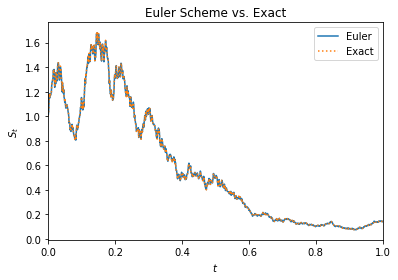

In [6]:
N=1000 #try changing N to 100, then 10.
np.random.seed(0)
tvec, S1=gbmsim(1, N)
np.random.seed(0)#use the same seed, otherwise we'd get different paths.
tvec, X=bmsim(1, N, 0, -.5)
S2=np.exp(X)
S1=pd.Series(S1, index=tvec)
S2=pd.Series(S2, index=tvec)
S1.plot()
S2.plot(linestyle=":")
plt.title("Euler Scheme vs. Exact")
plt.xlabel("$t$")
plt.ylabel("$S_t$")
plt.legend(["Euler", "Exact"]);

## The Black-Scholes Model

* Black and Scholes assumed the following model:
  * The stock $\{S_{t}\}_{t\in \lbrack 0,T]}$ follows GBM:
$$
dS_{t} =\mu S_{t}dt+\sigma S_{t}dW_{t}.
$$

  * The stock pays no dividends.
  * Cash bond price $B_{t}=e^{rt}\Longleftrightarrow dB_{t}=rB_{t}dt$; riskless lending and borrowing at the same rate $r$.
  * European style derivative option with price $C_{t}$ and payoff $C_{T}=(S_{T})$.
  * Trading may occur continuously, with no transaction costs.
  * No arbitrage opportunities.
* The problem is to find the option price $C_{t},t\in \lbrack 0,T]$. 

* It can be shown that the FTAP holds in continuous time as well: if the market is arbitrage free, then there exists a risk neutral measure $\mathbb{Q}$ under which all assets earn the risk free rate (on average), and the price of a claim is the discounted expected payoff under $\mathbb{Q}$. If the market is complete, then $\mathbb{Q}$ is unique. This gives us a pricing formula for general European claims:
$$
C_{t}=e^{-r(T-t)}\mathbb{E}^{\mathbb{Q}}\left[ \left.
C_{T}\right\vert \mathcal{F}_{t}\right] .
$$
* This implies that if we can simulate the stock price under the measure $\mathbb{Q}$, then we can price the claim by Monte Carlo simulation.

* In the BS model, it can be shown that under the risk-neutral measure $\mathbb{Q}$,
$$
dS_{t} =r S_{t}dt+\sigma S_{t}dW^{\mathbb{Q}}_{t},
$$
where $W^{\mathbb{Q}}_{t}$ is a $\mathbb{Q}$-Brownian Motion.
* Note that by Ito's Formula, the discounted stock price $\tilde{S}_t\equiv e^{-rt}S_t=:f(t,S_t)$ satisfies

\begin{align*}
d\tilde{S}_t&= \dot{f}(t,S_t) dt + f'(t,S_t) dS_t +\frac{1}{2}f''(t,S_t) \sigma^2 S_t^2 dt\\
&=-re^{-rt}S_tdt+e^{-rt}dS_t+0\\
&=-r\tilde{S}_tdt+e^{-rt}(r S_{t}dt+\sigma S_{t}dW^{\mathbb{Q}}_{t} )\\
&=\sigma \tilde{S}_{t}dW^{\mathbb{Q}}_{t},
\end{align*}
* I.e., $\tilde{S}_t$ is an Ito process without drift, and thus a martingale. This is the reason $\mathbb{Q}$ is also called the equivalent martingale measure.

* We can extend the BS model by assuming that the stock pays a continuous dividend at rate $\delta $. Then a position of 1 share generates an instantaneous dividend stream $\delta S_{t}dt$, in addition to the capital gains $dS_{t}$.
* Note that only the holder of the underlying receives the dividend; the option is written on the stock (without dividends).
* The pricing formula remains the same, but now the risk-neutral dynamics of $S_{t}$ are
$$
dS_{t}=(r-\delta )S_{t}dt+\sigma S_{t}dW^\mathbb{Q}_{t}.
$$
* The expected growth rate of the stock under $\mathbb{Q}$ is $r-\delta $, so the expected return from holding the stock (capital gains plus dividend yield) is $r$.
* The price of a call is now
$$
C_{t}=e^{-\delta (T-t)}S_{t}\Phi (d_{1})-e^{-r(T-t)}K\Phi (d_{2}),
$$
where
$$
d_{1,2}=\frac{\log (S_{t}/K)+[(r-\delta )\pm \frac{1}{2}\sigma ^{2}](T-t)}{\sigma \sqrt{T-t}}.
$$

## Monte Carlo Pricing
* The goal in Monte Carlo simulation is to obtain an estimate of
$$
\theta\equiv \mathbb{E}[X],
$$
for some random variable $X$ with finite expectation.
* Suppose we have a sample $\{X_i\}_{i\in\{1,\ldots,n\}}$ of *independent* draws of $X$, and let
$$
\bar{X}_n=\frac{1}{n}\sum_{i=1}^n X_i.
$$
* The sample average $\bar{X}_n$ is an *unbiased estimator* of $\theta$ : $\mathbb{E}[\bar{X}_n]=\theta$.
* The *weak law of large numbers* states that
$$
\bar{X}_n\stackrel p \rightarrow \theta,
$$
where the arrow denotes *convergence in probability*. This means that as the sample size grows, the sample mean becomes a better and better estimate of $\theta$.

* If we have a way of drawing random numbers from the distribution of $X$, then we can use this to estimate $\theta$: we simply draw $n$ realizations of $X$ and compute the sample mean of the $X_i$. $n$ is called the number of *replications*.
* For finite $n$, the sample average will be an approximation to $\theta$. 
* It is usually desirable to have an estimate of the accuracy of this approximation. Such an estimate can be obtained from the *central limit theorem* (CLT), which states that
$$
\sqrt{n}(\bar{X}_n-\theta)\stackrel d\rightarrow N\left(0,\sigma^2\right),
$$
provided that $\sigma^2$, the variance of $X$, is finite. The arrow denotes convergence in distribution; this implies that for large $n$, $\bar{X}_n$ has approximately a normal distribution.
* Of course $\sigma^2$ is unknown, but we can estimate it as
$$
\hat{\sigma}^2=\frac{1}{n}\sum_{i=1}^n \left(\bar{X}_n-X_i\right)^2.
$$

* A 95% *confidence interval* (CI) is an interval $[c_l,c_u]$ such that
$$
\mathbb{P}[c_l\leq \theta \leq c_u]=0.95.
$$
* The CLT implies that, in the limit as $n\rightarrow\infty$,

\begin{align*}
\mathbb{P}[-1.96 \sigma\leq \sqrt{n}(\bar{X}_n-\theta)\leq 1.96 \sigma ]&=0.95\Leftrightarrow\\
\mathbb{P}[\bar{X}_n-1.96 \frac{\sigma}{\sqrt{n}}\leq \theta\leq \bar{X}_n+1.96 \frac{\sigma}{\sqrt{n}} ]&=0.95.
\end{align*}
* Hence $c_l=\bar{X}_n-1.96 \frac{\sigma}{\sqrt{n}}$ and $c_u=\bar{X}_n+1.96 \frac{\sigma}{\sqrt{n}}$ asymptotically.
* Note that $c_l$ and $c_u$ are random variables; we should interpret this as "before the experiment is performed, there is a 95% chance that a CI computed according to this formula will contain $\theta$". After performing the experiment, this statement is not valid anymore; the interval is now fixed, and contains $\theta$ with probability either 0 or 1.
* The unknown parameter $\sigma$ can be consistently estimated by $\sqrt{\hat{\sigma}^2}$.

* Our pricing formula
$$
C_{t}=e^{-r(T-t)}\mathbb{E}^{\mathbb{Q}}\left[ \left.
C_{T}\right\vert \mathcal{F}_{t}\right] .
$$
is exactly in the form required for Monte Carlo Simulation. 
* As an example, consider pricing an arithmetic average price call with payoff
$$
C_T=(\bar{S}_T-K)^+,\quad\mbox{where}\quad \bar{S}_T=\frac{1}{N}\sum_{i=1}^N S_{t_i}.
$$
* Note that this is a real-world example: we have no analytical formula for the price.
* The payoff is path-dependent, sowe need to simulate the entire asset price path, not just $S_T$.

In [7]:
def asianmc(S0, K, T, r, sigma, delta, N, numsim=1000):
    """
    Monte Carlo price of an arithmetic average Asian call.
    """
    X0=np.log(S0)
    nu=r-delta-.5*sigma**2
    payoffs=np.zeros(numsim)
    for j in xrange(numsim):
        _, X=bmsim(T, N, X0, nu, sigma) #convention: underscore holds value to be discarded
        S=np.exp(X)
        payoffs[j]=max(S[1:].mean()-K, 0.)
    g=np.exp(-r*T)*payoffs
    C=g.mean();s=g.std()
    Cl=C-1.96/np.sqrt(numsim)*s
    Cu=C+1.96/np.sqrt(numsim)*s
    return C, Cl, Cu

In [8]:
np.random.seed(0)
C0, Cl, Cu=asianmc(11, 10, 3/12., 0.02, .3, 0., 10, 10**4); C0, Cl, Cu

(1.1058600172112409, 1.0878201787819213, 1.1238998556405606)

## Code optimization
* Our code for pricing the Asian option is likely inefficient, because it contains a loop.
* The code can be 'vectorized' to speed it up. 
* First step: simulate a bunch of Brownian paths in one shot.
* The resulting code is actually almost identical:

In [9]:
def bmsim_vec(T, N, X0=0, mu=0, sigma=1, K=1): #note new input: K, the number of paths
    """
    Simulate K Brownian motion paths.
    """
    deltaT=float(T)/N
    tvec=np.linspace(0, T, N+1)
    z=np.random.randn(K, N+1) #(N+1)->(K, N+1)
    dX=mu*deltaT+sigma*np.sqrt(deltaT)*z
    dX[:, 0]=0. #dX[0]->dX[:, 0]
    X=np.cumsum(dX, axis=1) #cumsum(dX)->cumsum(dX, axis=1)
    X=X+X0    
    return tvec, X

In [10]:
np.random.seed(0) 
tvec, W=bmsim_vec(1, 1000, K=3)
W=pd.DataFrame(W.transpose(), index=tvec)
W.plot().legend().remove()
plt.title('Simulated Brownian Motion Paths')
plt.xlabel("$t$"); plt.ylabel("$W_t$");
plt.savefig("img/BMpaths.svg"); plt.close()

<img src="img/BMpaths.svg" alt="Simulated Brownian Motion Paths" style="display:block; margin-left: auto; margin-right: auto; width: 80%;">

* Here is the vectorized code for the Asian option:

In [11]:
def asianmc_vec(S0, K, T, r, sigma, delta, N, numsim=1000):
    """
    Monte Carlo price of an arithmetic average Asian call.
    """
    X0=np.log(S0)
    nu=r-delta-.5*sigma**2    
    #simulate all paths at once:
    _, X=bmsim_vec(T, N, X0, nu, sigma, numsim)
    S=np.exp(X)
    payoffs=np.maximum(S[:, 1:].mean(axis=1)-K, 0.) #S[1:]->S[:, 1:], max->maximum, mean()->mean(axis=1)
    g=np.exp(-r*T)*payoffs
    C=g.mean();s=g.std()
    Cl=C-1.96/np.sqrt(numsim)*s
    Cu=C+1.96/np.sqrt(numsim)*s
    return C, Cl, Cu

* Let's see if it works:

In [12]:
np.random.seed(0)
C0_vec, _, _=asianmc_vec(11, 10, 3/12., 0.02, .3, 0., 10, 10**4)
np.allclose(C0_vec, C0)

True

* And time it:

In [13]:
%timeit asianmc(11, 10, 3/12., 0.02, .3, 0., 10, 10**4)

1 loop, best of 3: 348 ms per loop


In [14]:
%timeit asianmc_vec(11, 10, 3/12., 0.02, .3, 0., 10, 10**4)

100 loops, best of 3: 6.2 ms per loop


* Our code for the Euler scheme can likewise be adjusted to compute many paths in one shot. 
* We're still stuck with the loop over $t$ though, which cannot be vectorized because $S_{i+1}$ depends on $S_i$.
* We'll use Numba's JIT compiler to speed it up further.

In [15]:
from numba import jit
@jit
def gbmsim_vec(T, N, S0=1, mu=0, sigma=1, K=1, seed=0):
    "Simulate K Geometric Brownian motion paths."
    deltaT=float(T)/N
    tvec=np.linspace(0, T, N+1)
    np.random.seed(seed) #Note: with jit-compiled functions, the RNG must be seeded INSIDE the compiled code
    z=np.random.randn(K, N+1)
    S=np.zeros_like(z)
    S[:, 0]=S0
    for j in xrange(0, N):
        S[:, j+1]=S[:, j]+mu*S[:, j]*deltaT+sigma*S[:, j]*np.sqrt(deltaT)*z[:, j+1]
    return tvec, S #it would be nice to return a pd.Series, but numba.jit chokes on it

In [16]:
tvec, S=gbmsim_vec(1, 1000, K=3, seed=0)
S=pd.DataFrame(S.transpose(), index=tvec)
S.plot().legend().remove()
plt.title('Simulated Geometric Brownian Motion Paths')
plt.xlabel("$t$"); plt.ylabel("$S_t$")
plt.savefig("img/GBMpaths.svg"); plt.close()

<img src="img/GBMpaths.svg" alt="Simulated Geometric Brownian Motion Paths" style="display:block; margin-left: auto; margin-right: auto; width: 80%;">

* The compiled code produces the same results:

In [17]:
np.random.seed(0)
_, S1=gbmsim(1, 1000)
_, S2=gbmsim_vec(1, 1000, K=1, seed=0)
np.allclose(S1, S2)

True

* But it is quite a bit faster:

In [18]:
%%timeit
for k in xrange(10): #10 paths
    gbmsim(1, 1000)

10 loops, best of 3: 23.9 ms per loop


In [19]:
%timeit gbmsim_vec(1, 1000, K=10)

The slowest run took 540.58 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 574 µs per loop
